In [179]:
#importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
#reading data
data = pd.read_csv('ex1data1.txt',header=None)
X = data.iloc[:,0] #read first column
y = data.iloc[:,1] #read second column
m = len(y)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


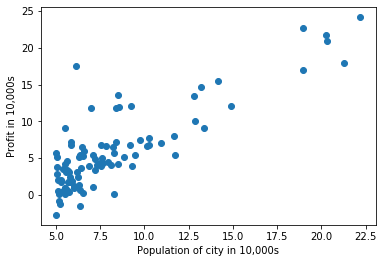

In [181]:
#plotting the data
plt.scatter(X,y)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in 10,000s')
plt.show()

In [182]:
#adding another dimension to data and initializing alpha and theta
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones,X))

In [183]:
#computing the cost
def computeCost(X,y,theta):
    h_temp = np.dot(X,theta)
    h_sub = h_temp - y
    h_squared = np.power(h_sub,2)
    h_final = np.sum(h_squared)/(2*m)
    return h_final

J = computeCost(X,y,theta)
print(J)

32.072733877455676


In [203]:
#finding the optimal parameters using gradient descent
def gradientDescent(X,y,theta,alpha,iterations):
    for _ in range(iterations):
        temp = np.dot(X,theta) - y
        temp = np.dot(X.T,temp)
        #print(temp)
        theta = theta - (alpha/m)*temp
    return theta

theta = gradientDescent(X,y,theta,alpha,iterations)
print(theta)

[[-3.58741911]
 [ 1.16205536]]


In [204]:
J = computeCost(X,y,theta)
print(J)

4.485628039320559


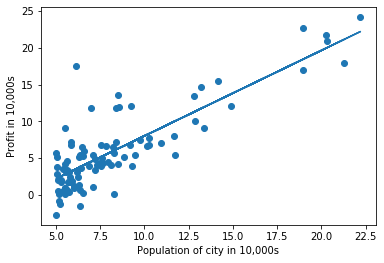

In [205]:
#plotting the best fit line
plt.scatter(X[:,1],y)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in 10,000s')
plt.plot(X[:,1],np.dot(X,theta))
plt.show()